# Historical Building Recognition System

Pattern recognition is the process of recognizing patterns and regularities by using machine learning algorithm. In this project, the dataset that we are using for pattern recognition is historical buildings. 

This historical building recognition system can perform classification of the historical buildings in Malacca, Malaysia. The model is trained with images of three historical buildings, namely Stadhuys, St Paul Church, and A'Famosa. The images are taken from different angles and at different times of a day.

### Contents:

1. [Importing images](#import)

2. [Saving images & labels into a txt file](#save)

3. [PCA](#pca)

4. [StandardScaler](#standardscaler)

5. [Training the model with Neural Network](#nn)

6. [Training the model with k-NN](#knn)

7. [Training the model with SVC](#svc)

8. [Compare performances](#compare)

<a id='import'></a>
## Importing images

In [8]:
import glob
import numpy as np
import cv2

# Import images
data=[]

for f in glob.iglob("Data/*"):
    image=cv2.imread(f)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    data.append(np.asarray(gray))
   

data=np.array(data)
print(data)

[[[225 226 226 ... 225 225 224]
  [225 225 226 ... 224 224 224]
  [224 224 225 ... 223 223 223]
  ...
  [ 49  51  50 ...  46  36  52]
  [ 58  60  55 ...  45  33  46]
  [ 61  68  59 ...  29  33  47]]

 [[216 216 216 ... 220 222 223]
  [216 216 216 ... 221 222 223]
  [215 215 215 ... 221 222 223]
  ...
  [ 26  56  98 ... 103 110 106]
  [ 64  58  67 ...  55  66  62]
  [ 30  94 177 ...  75  80  67]]

 [[200 200 200 ... 214 214 214]
  [201 201 201 ... 214 214 214]
  [202 202 202 ... 214 214 214]
  ...
  [ 64  68  76 ...  50  42  45]
  [ 55  58  58 ...  59  40  37]
  [ 58  54  37 ...  66  40  34]]

 ...

 [[215 216 214 ... 210 210 210]
  [218 218 217 ... 209 209 209]
  [220 220 219 ... 207 207 207]
  ...
  [157 158 158 ...  34  35  41]
  [158 158 158 ...  20  21  24]
  [158 158 159 ...  28  28  28]]

 [[194 195 195 ... 190 191 191]
  [194 195 195 ... 190 191 192]
  [196 196 196 ... 192 192 193]
  ...
  [ 51  73  67 ...  18  17  16]
  [ 47  65  66 ...  18  17  16]
  [ 48  60  66 ...  18  17  

In [9]:
print(data.shape)

(162, 100, 100)


<a id='save'></a>
## Saving images & labels into a txt file

In [10]:
np.savetxt("image.txt",data.reshape(162,10000))

In [11]:
# Create labels
labels=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                 2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

# Save the labels into txt file
np.savetxt("label.txt",labels)

<a id='pca'></a>
## PCA

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [12]:
# Load images and labels from txt
images=np.loadtxt("image.txt")
labels=np.loadtxt("label.txt")

In [13]:
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=42)

In [14]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of testing set: {}".format(X_test.shape))

Shape of training set: (121, 10000)
Shape of testing set: (41, 10000)


In [15]:
def image_grid(D,H,W,cols=5,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]),cmap = plt.get_cmap("gray"))
        plt.axis('off')

In [16]:
H=100
W=100

#Show training images
image_grid(X_train,H,W)
plt.show()

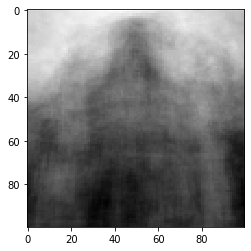

In [17]:
#Find the mean image
mean_image=np.mean(X_train,axis=0)

plt.imshow(np.reshape(mean_image,[H,W]),cmap=plt.get_cmap("gray"))
plt.show()

In [18]:
from sklearn.decomposition import PCA
n_components = 50

# Extracting the top 50 eigenfaces from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

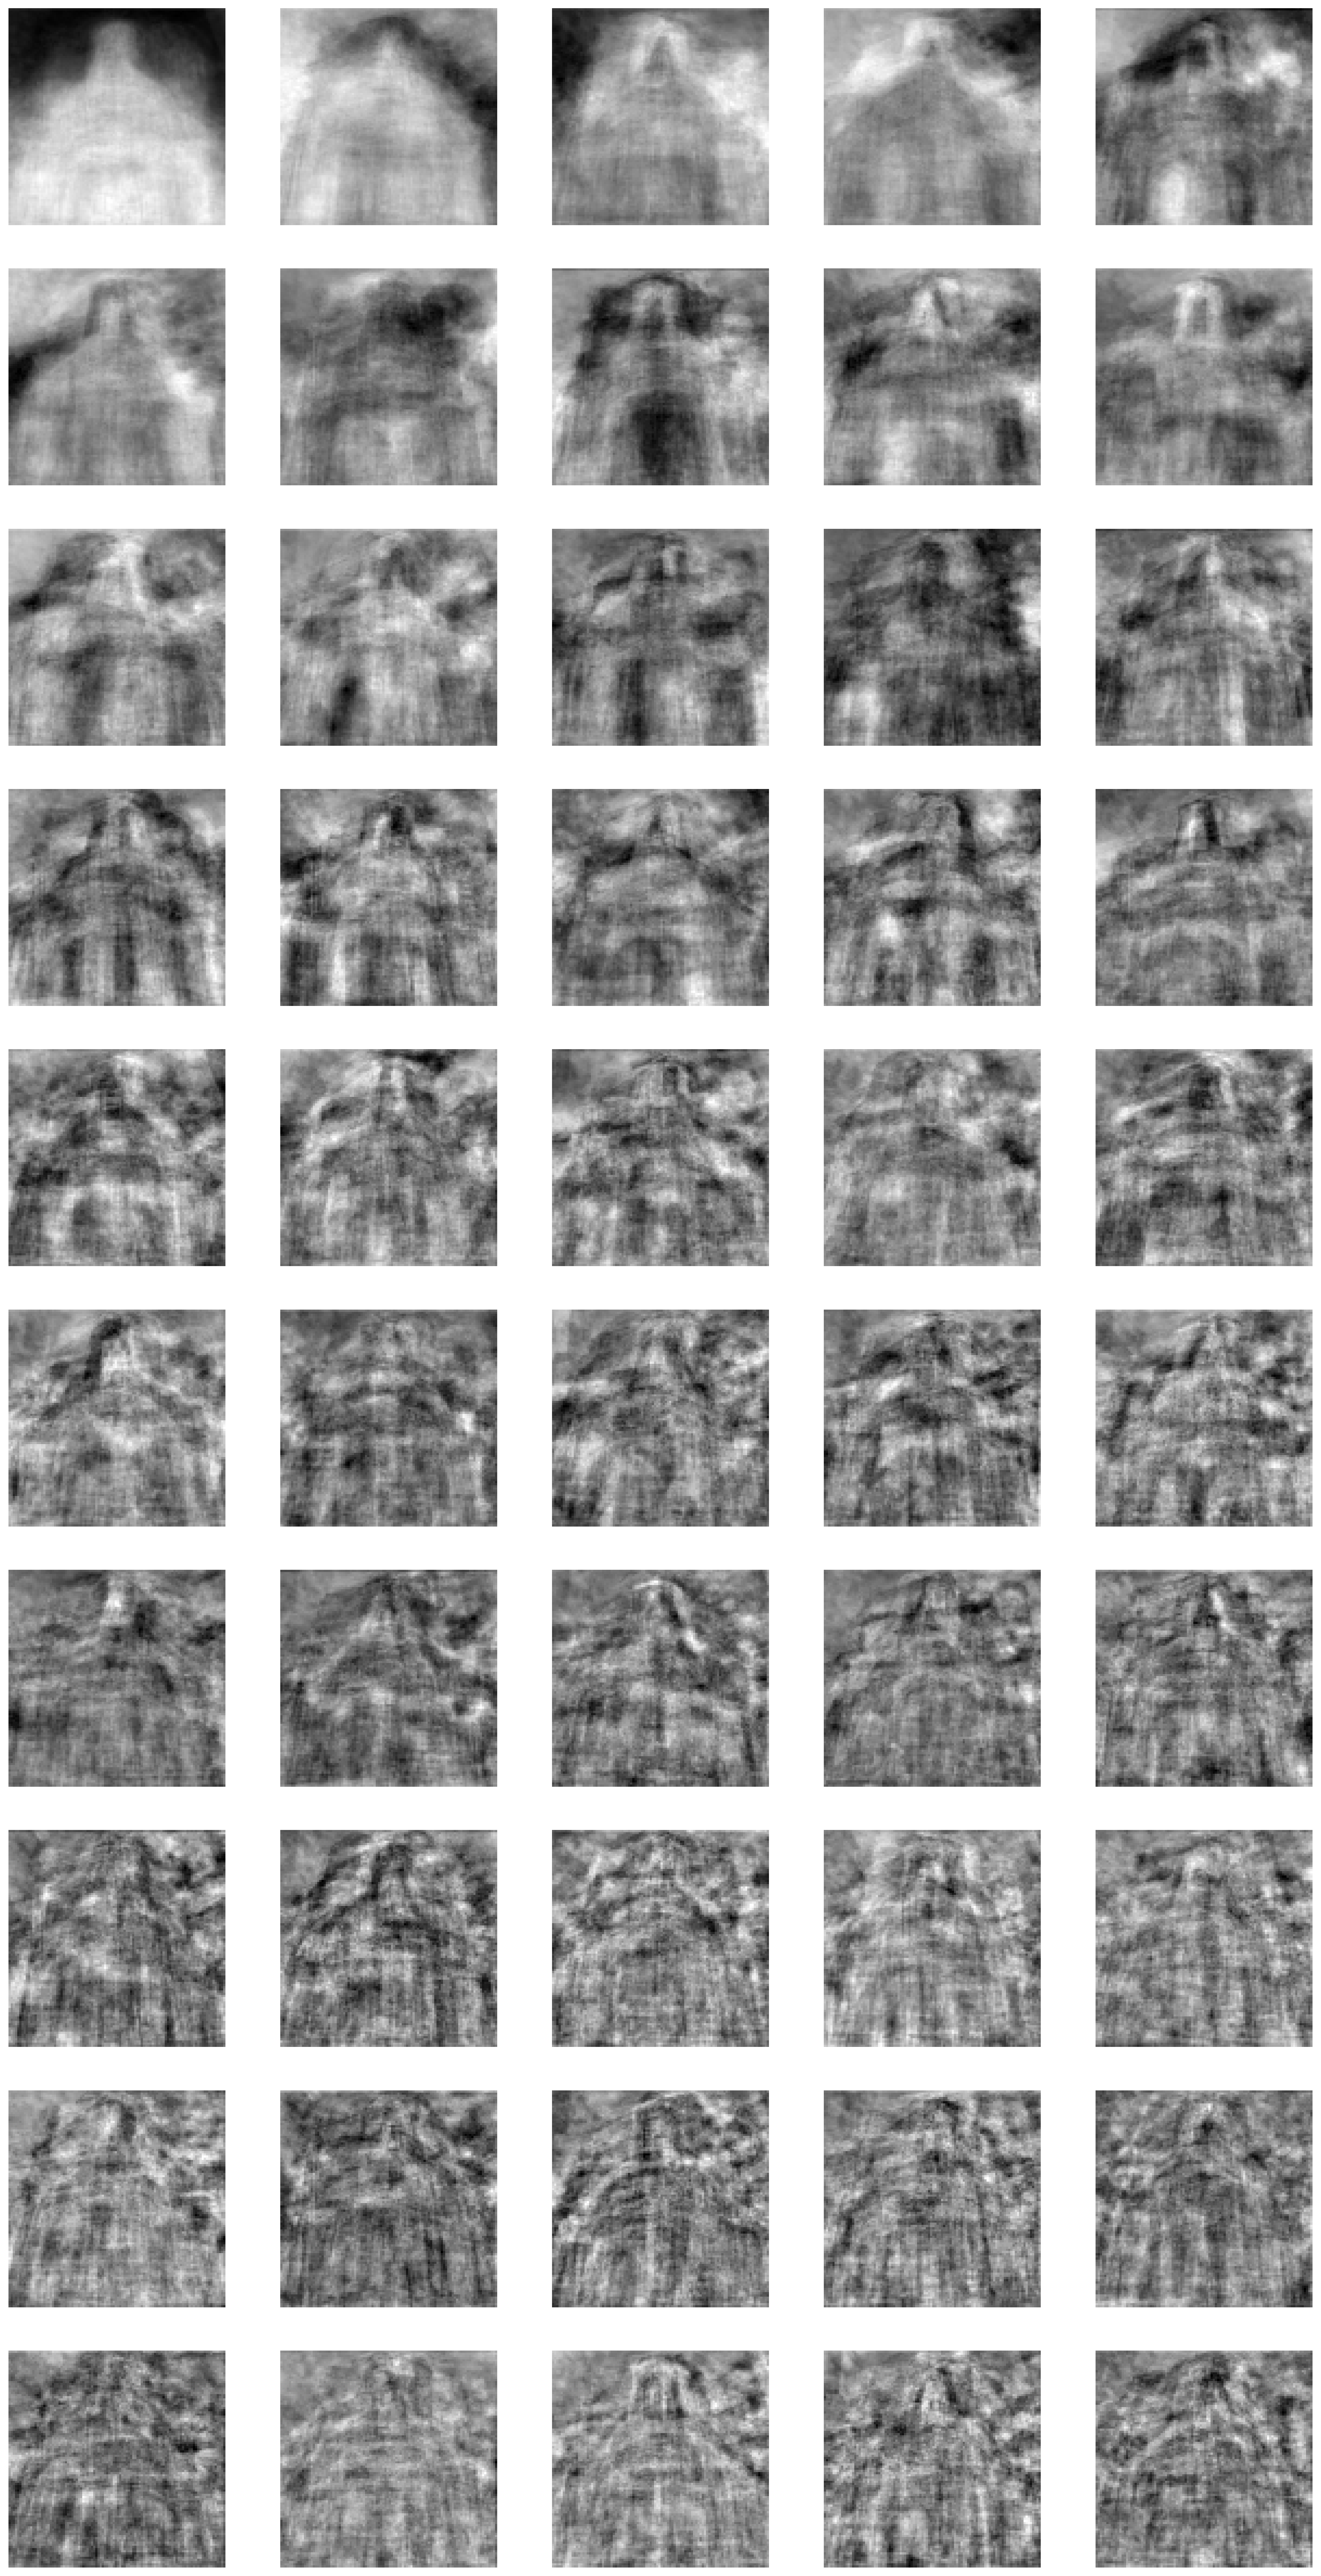

In [19]:
# Showing the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:], H, W)
plt.show()

eigenfaces = eigenfaces.reshape((n_components, H, W))

In [20]:
# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

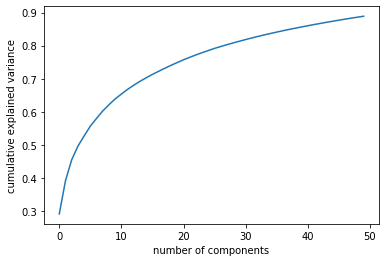

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [22]:
# Intraclass distance is the distance between two points in the same class
# Interclass distance is the distance between two points in different classes.
intra_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[1,:]),2))
inter_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))

Intra-class distance: 104
Inter-class distance: 77


<a id='standardscaler'></a>
## StandardScaler 

StandardScaler removes the mean and scales each feature/variable to unit variance.

In [23]:
print("Shape of pca training set: {}".format(X_train_pca.shape))
print("Shape of pca testing set: {}".format(X_test_pca.shape))

Shape of pca training set: (121, 50)
Shape of pca testing set: (41, 50)


In [24]:
# Preprocessing : Scale the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# Fit to the training data
scaler.fit(X_train_pca)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Now, apply transformation to data
X_train = scaler.transform(X_train_pca)
X_test = scaler.transform(X_test_pca)

<a id='nn'></a>
## Training the model with Neural Network

In [26]:
# Loading library
from sklearn.neural_network import MLPClassifier

In [27]:
# Create a model with 3 layers
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [28]:
# Fit training data to model
mlp.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [29]:
# Use neural network to help us do prediction/classification
predictions_nn = mlp.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_nn))

# 0 is A Famosa, 1 is ChristChurch, 2 is Stadhuys

[[10  2  3]
 [ 2 14  0]
 [ 0  0 10]]


In [48]:
accuracy_nn=metrics.accuracy_score(y_test, predictions_nn)

In [31]:
print(classification_report(y_test,predictions_nn))

              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74        15
         1.0       0.88      0.88      0.88        16
         2.0       0.77      1.00      0.87        10

    accuracy                           0.83        41
   macro avg       0.83      0.85      0.83        41
weighted avg       0.83      0.83      0.82        41



<a id='knn'></a>
## Training the model with k-NN

In [32]:
# Loading library
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Instantiate learning model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
# Fit training data to model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
# Use kNN to help us do prediction/classification
predictions_knn = knn.predict(X_test)

In [51]:
accuracy_knn=metrics.accuracy_score(y_test, predictions_knn)

In [45]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.86      0.75      0.80        16
         2.0       0.62      1.00      0.77        10

    accuracy                           0.78        41
   macro avg       0.80      0.81      0.78        41
weighted avg       0.82      0.78      0.78        41



<a id='svc'></a>
## Training the model with SVC

In [37]:
# Loading library
from sklearn import svm

In [38]:
# Create a Support Vector Classifier
svc=svm.SVC(kernel='linear',C=1.0)

In [39]:
# Fit training data to model
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
# Predict the response for test dataset
predictions_svc = svc.predict(X_test)

In [53]:
from sklearn import metrics

# Get accuracy
accuracy_svc=metrics.accuracy_score(y_test, predictions_svc)

In [46]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        15
         1.0       0.88      0.88      0.88        16
         2.0       0.90      0.90      0.90        10

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



<a id='compare'></a>
## Compare performances

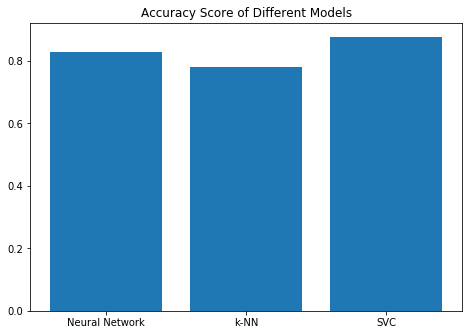

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Neural Network', 'k-NN', 'SVC']
results = [accuracy_nn,accuracy_knn,accuracy_svc]
ax.bar(model,results)
ax.set_title('Accuracy Score of Different Models')
plt.show()